In [ ]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

# Homework

## Problem 1

Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

In [ ]:
def f(x):
    return x - np.exp(-x) # x - e^-x = 0

print(f(-1), f(0), f(1))

# we'd choose Bound B (thus discarding Bound A) since the two bounds have opposite signs, implying there is a solution between them.

-3.718281828459045 -1.0 0.6321205588285577


In [ ]:
def f(x):
    return x - np.exp(-x) # x - e^-x = 0

def bisection(f, l, r, e) -> float: # f: function, l: left-bound, r: right-bound, e: error
    error = (r-l) / 2
    while error > e:
        guess = (l+r) / 2
        error = (r-l) / 2
        value = f(guess)

        if value == 0:
            return guess # exact solution
        elif value * f(l) < 0:
            r = guess
        elif value * f(r) < 0:
            l = guess

    return guess

bisection(f, 0, 1, 1e-6)

0.567143440246582

## Problem 2
Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 -
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$

Make sure your answers are at most $10^{-6}$ away from the real solution.

In [ ]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7

print(f(0), f(1))
# issue with this function is that there are many instances where f(x) = 0 so we need valid bounds such that between them could be A solution

-0.000216747 -0.07515324699999937


In [ ]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7

def bisection(f, l, r, e) -> float: # f: function, l: left-bound, r: right-bound, e: error
    error = (r-l) / 2
    while error > e:
        guess = (l+r) / 2
        error = (r-l) / 2
        value = f(guess)

        if value == 0:
            return guess # exact solution
        elif value * f(l) < 0:
            r = guess
        elif value * f(r) < 0:
            l = guess

    return guess

def find_solution(function, l, r, interval, error):
    intervals = np.arange(l, r, interval)
    ans = []
    i = 0

    while i < len(intervals):
      b1 = intervals[i]
      if i < len(intervals) - 1: # prevent going out of bounds
        b2 = intervals[i + 1]
      if function(b1) * function(b2) < 0: # solution bounds
        ans.append(bisection(function, b1, b2, error))
      i += 1

    return ans

ans20 = find_solution(f, 0, 1, 1e-3, 1e-6)
print(ans20)

[0.12216699218749999, 0.2200283203125, 0.3332978515625, 0.7854091796875]


2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

In [ ]:
def fp(x):
    return 0.0072868 - 2*0.0977383*x + 3*0.664685*x**2 - \
            4*2.40773*x**3 + 5*4.46766*x**4 - 6*3.7091*x**5 + 7*x**6
def fpp(x):
    return -2*0.0977383 + 6*0.664685*x - 12*2.40773*x**2 + \
           20*4.46766*x**3 - 30*3.7091*x**4 + 42*x**5

ans21 = find_solution(fp, 0, 1, 1e-3, 1e-6)

# confirming whether they are minimum or maximum
for answer in ans21:
  if fpp(answer) < 0: # <0 meaning maximum
    text = "maximum"
  elif fpp(answer) > 0:
    text = "minimum"
  print(f"{answer} : {text}")

0.1913681640625 : maximum
0.2970908203125 : minimum
0.6817802734375 : maximum


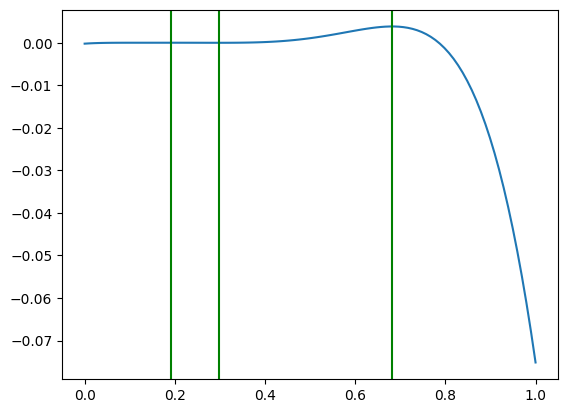

In [ ]:
xs = np.linspace(0,1,100)
ys = f(xs)

plt.plot(xs,ys)

for x in ans21:
  plt.axvline(x, color='green') # solutions


2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

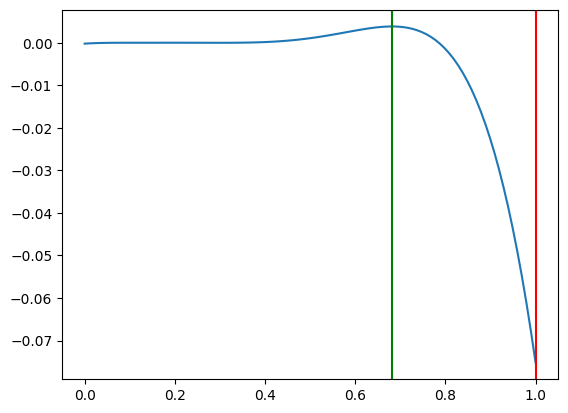

In [ ]:
xs = np.linspace(0,1,100)
ys = f(xs)
plt.plot(xs,ys)

ans21 = ans21 + [0,1]
ans22 = [f(ans) for ans in ans21]

plt.axvline(ans21[ans22.index(min(ans22))], color='red', label='minimum')
plt.axvline(ans21[ans22.index(max(ans22))], color='green', label='maximum')


## Problem 3
In quantum physics, when finding a bound state for a finite potential well one would end up with the following equation(Yes E is negative):

$$
\sqrt{\frac{-E}{E+V_0}} = \tan \sqrt{2m \frac{E+V_0}{\hbar^2} a}
$$

The goal is to find all Energy($E$) that satisfy this equation.
For simplicity, let
- $V_0 = 1$
- $m = 1$
- $a = 1$
- $\hbar = 1$(Yes this is called natural unit)

$$
    \sqrt{\frac{-E}{E+1}} = \tan \sqrt{2(E+1)}
$$

Find the value for $E\in (-1.0, 0)$ which satisfy the equation above). Make sure you accuracy is $<\pm10^{-4}$


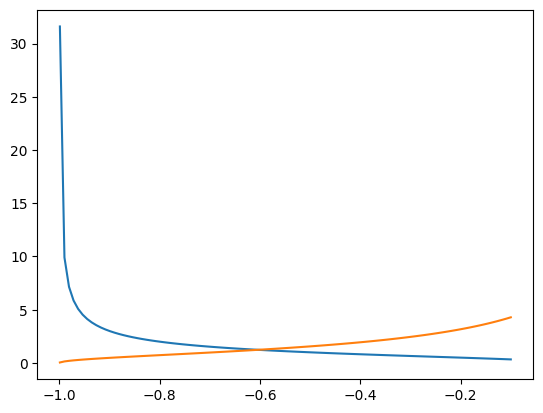

In [ ]:
def f(x):
    return math.sqrt(-x/(x+1))
def g(x):
    return math.tan(math.sqrt(2*(x + 1)))

xs = np.linspace(-0.999,-0.1, 100)
fx = [f(x) for x in xs]
gx = [g(x) for x in xs]
plt.plot(xs,fx)
plt.plot(xs,gx)

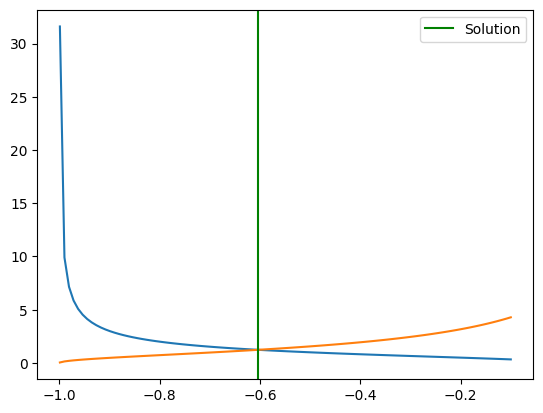

In [ ]:
def h(x):
  return f(x) - g(x)

solution = bisection(h, -0.999, 0, 1e-4) # f(-1) has division by 0 error so we must compensate for that. this is the answer.

xs = np.linspace(-0.999,-0.1, 100)
fx = [f(x) for x in xs]
gx = [g(x) for x in xs]
plt.plot(xs,fx)
plt.plot(xs,gx)

plt.axvline(solution, color='green', label='Solution')
plt.legend()

## Problem 4
Ply quit programming and decide to be a Apple(fruit) shop owner. He bought 1000 apples everyday and try to sell it. The probability $k$ customer want Ply's apple(one each) is given by Poisson distribution:

$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Where $\lambda$ is an parameter that represent the mean of number of people that want Ply's apple each day.

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

The goal for this problem is to figure out how he should change the number of apples he bought in a day.

- In case you are curious https://en.wikipedia.org/wiki/Poisson_distribution. The true distribution of this selling apple process should be binomial distribution but with large enough customer and low enough probability of an individual buying an apple this is an excellent approximatoin.

4.1) You may find that if you try to code poisson distribution directly. It will not work with large number.
$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Explain briefly why python complains

In [ ]:
import math
def bad_poisson(lmd, k):
    return pow(lmd,k)*math.exp(-lmd)/math.factorial(k)
# bad_poisson(1000,1000) # uncomment to see it breaks

# Python complains that there is an OverflowError meaning that something, presumably k! or lmb^k, is too big for Python to handle.
# 1000^1000 and 1000! are both big.

4.2) A very useful trick to avoid this problem is to take log and exponentiate. That is

$$
    P(k; \lambda) = \exp\left( \ln \left[ \frac{\lambda^k \exp(-\lambda)}{k!} \right] \right)
$$

First, show that
$$
    \ln(P(k; \lambda)) = (\ldots \ln(\ldots)-\ldots)-\ln(k!)
$$



**My answer:**  

$$
    \ln(P(k; \lambda)) = (k \ln(\lambda)- \lambda)-\ln(k!)
$$

Since $\ln(e^{-\lambda}) = -\lambda$ and $\ln(\lambda^k) = k \ln (\lambda)$ per log rules.

4.3) $\ln(k!)$ shows up everywhere in math. So most math library have `lgamma` function to compute this very fast.
For example,

`math.lgamma(5) == math.log(math.factorial(4))`

Your job for this problem is to implement $P(k; \lambda)$ using log-exp trick.

If you do it right, $P(k=1000; \mu=1000) \approx 0.0126146$

In [ ]:
def poisson2(lmd, k):
    rhs = (k*math.log(lmd) - lmd) - math.lgamma(k + 1)
    return math.exp(rhs) # cancel out ln w/ e

poisson2(1000,1000)

0.012614611348719664

4.4) Now here is the fun part. Suppose that $\lambda = 987.6$(this is not true). Find the probability that Ply will sell all his 1000 apples. (Remember if 2000 people want Ply's apple, he his apple will also be sold out).

And No, summing up to infinity is not practical.

In [ ]:
# p(x >= 1000) = 1 - p(x < 1000)

ans = 1 - sum(poisson2(987.6, i) for i in range(1000)) #p(0) to p(999) for lambda = 987.6
print(ans)

0.3507846581670552


4.5) Recall the information that

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

Find the value for $\lambda$ to a decent accuracy($<\pm 0.1$)

In [ ]:
def soldout(lmd, k): # sold out
    return 1 - sum(poisson2(lmd, i) for i in range(k))
def f(x):
    return soldout(x, 1000) - 600/2000

# min bound is 1000 * 600/2000 = 300
# max bound is sold out all days

ans = bisection(f, 300, 2000, 1e-2) # bisection from Problem 2 | used to find value of lambda
print(ans)

983.1737518310547


4.6) Using $\lambda$ you found in 4.5).

Ply bounght apple for 20 Baht each and he sell it for 50 Baht each. Which means that for each apple he sells he make a profit of 30 baht. But, at the end of each day Ply has to trash all unsold Apples(taking a loss of 20 Baht each).

If Ply bought 1000 apples a day, what would be his expected profit(remember expected value from discrete math/stat/quantum?).

In [ ]:
# E[profit] = E[revenue if sold out all] + E[revenue if sold out for each in-between] + E[revenue if sold none]

n = 1000

sold_all = soldout(ans, n) * 50 * n
sold_some = sum(poisson2(ans, i) * 50 * i for i in range(1, n))
sold_none = -20 * n

sold_all + sold_some + sold_none

28864.441813206788

4.7) Using $\lambda$ you found in 4.5) Find the number of apple Ply should buy in a day to maximize his expected profit.

The maximum profit is 28888.756582226153, which comes from buying 991 apples


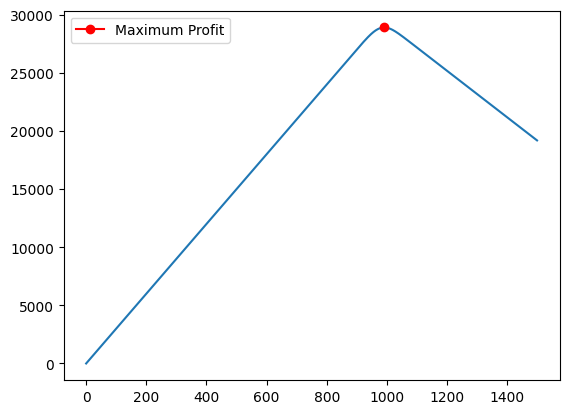

In [ ]:
def profit(n):
    sold_all = soldout(ans, n) * 50 * n
    sold_some = sum(poisson2(ans, i) * 50 * i for i in range(1, n))
    sold_none = -20 * n

    return sold_all + sold_some + sold_none

xs = list(range(1500))
ys = [profit(x) for x in xs]

plt.plot(xs,ys)

apples = xs[ys.index(max(ys))]
max_profit = max(ys)

plt.plot(apples, max_profit, color='red', marker='o', label='Maximum Profit')
plt.legend()

print(f"The maximum profit is {max_profit}, which comes from buying {apples} apples")

## Problem 5

Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a the distribution is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum.

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

Text(0, 0.3, 'FWHM')

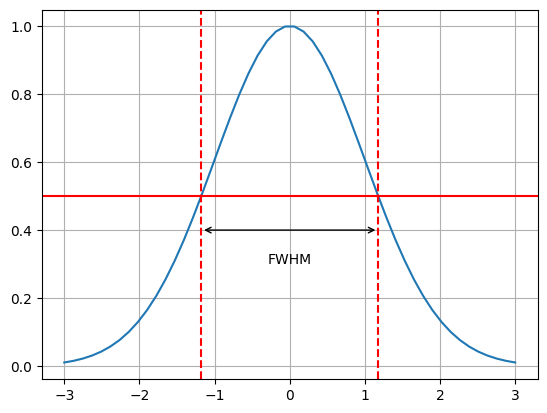

In [ ]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')

5.1)Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

6.200124999999317


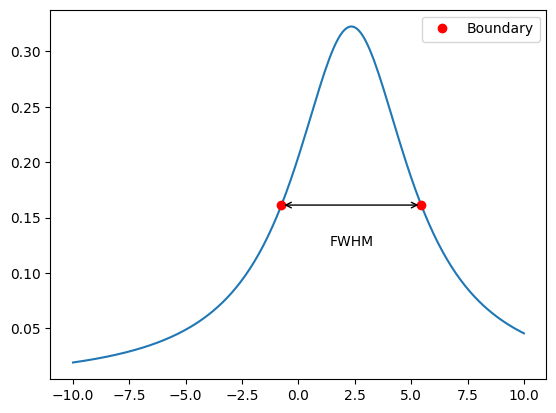

In [ ]:
import math
def f(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)

def fp(x, gamma=3.1): #first derivative per quotient rule
  mu = 2.345
  temp = ((x-mu)**2+gamma**2)
  return (-2*gamma*(x-mu))/(temp**2)

assumed_max = bisection(fp, 1, 4, 1e-4) # same as mu in example functions but more accurate

def fhalf(x):
  global assumed_max # this function only applies to this question
  return f(x) - (f(assumed_max)*0.5)

# eyeballing the graph, we assume that the maximum is probably between 1 and 4
# should likely only have a maxmimum since f(x) is quadratic

halves = find_solution(fhalf, -2.5, 7.5, 1e-3, 1e-4) # bounds are a bit optimistic since i'm eyeballing the graph

fwhm = max(halves) - min(halves) # should only be two values in halves
print(fwhm)

x = np.linspace(-10,10,200)
y = [f(xx) for xx in x]
plt.plot(x,y)

# plot the boundaries for the halfway mark
plt.plot(halves[0], f(halves[0]), 'ro', label='Boundary') # both red dots are boundaries anyway
plt.plot(halves[1], f(halves[1]), 'ro')
plt.annotate(
    '', xy=(halves[0], f(assumed_max)*0.5), xycoords='data',
    xytext=(halves[1], f(assumed_max)*0.5), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(assumed_max,0.125,'FWHM',horizontalalignment ='center')

plt.legend()



5.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

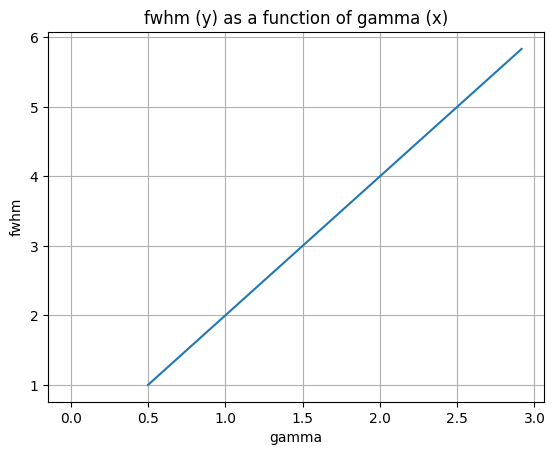

In [ ]:
# print(f(1.0, gamma=0.2)) # you may find this useful

def altered_f(x, gamma):
    global current_max
    mu = current_max
    return gamma/((x-mu)**2+gamma**2)

def altered_fp(x, gamma):
    global current_max
    mu = current_max
    temp = ((x-mu)**2+gamma**2)
    return (-2*gamma*(x-mu))/(temp**2)

def altered_fhalf(x, gamma):
    global current_max # this function only applies to this question
    return altered_f(x, gamma) - (altered_f(current_max, gamma)*0.5)

def altered_bisection(f, gamma, l, r, e) -> float: # slightly different bisection
    error = (r-l) / 2
    while error > e:
        guess = (l+r) / 2
        error = (r-l) / 2
        value = f(guess, gamma)

        if value == 0:
            return guess # exact solution
        elif value * f(l, gamma) < 0:
            r = guess
        elif value * f(r, gamma) < 0:
            l = guess

    return guess

def altered_find_solution(function, gamma, l, r, interval, error): # an altered version of find_solution
    intervals = np.arange(l, r, interval)
    ans = []
    i = 0

    while i < len(intervals):
      b1 = intervals[i]
      if i < len(intervals) - 1: # prevent going out of bounds
        b2 = intervals[i + 1]
      if function(b1, gamma) * function(b2, gamma) < 0: # solution bounds
        ans.append(altered_bisection(function, gamma, b1, b2, error))
      i += 1

    return ans

interval = (3-0.5) / 30 # 30 points
start = 0.5
current_max = assumed_max # from previous problem, i really dont know what to do here
fwhm = []
while start <= 3:
    current_max = altered_bisection(altered_fp, start, 1, 4, 1e-4)
    points = altered_find_solution(altered_fhalf, start, -5, 10, 1e-3, 1e-4) # wide bounds
    current_fwhm = max(points) - min(points)
    fwhm.append([start, current_fwhm])
    # plt.plot(points[0], f(points[0]), 'go')
    # plt.plot(points[1], f(points[1]), 'go')
    start += interval

xs = [x[0] for x in fwhm]
ys = [x[1] for x in fwhm]

plt.plot(xs,ys,5)
plt.xlabel('gamma')
plt.ylabel('fwhm')
plt.title('fwhm (y) as a function of gamma (x)')
plt.grid()





5.3) (Optional) Prove the relation you found in 5.2)